In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
csv_path = "/Users/frodibrooks/Desktop/DTU/Thesis/OptimisedHeating/validation/validation_full_log_agent11.csv"
agent_results_df = pd.read_csv(csv_path)

In [17]:
# Set 'Step' as the index
agent_results_df = agent_results_df.set_index('Step')

# Scale the 'EffRatio' column by multiplying it by 3
agent_results_df['EffRatio'] = agent_results_df['EffRatio'] * 3
agent_results_df['Energy'] = agent_results_df['Energy']*-0.02

# Display the updated DataFrame (all columns should remain intact)
agent_results_df.head()


,ActionIndex,DemandScale,Reward,EffRatio,ValidHeadsRatio,Energy,Q_0,Q_1,Q_2,Q_3,...,Head_16,Head_17,Head_18,PumpGroupSpeed_1,PumpGroupSpeed_2,PumpPower_10,PumpPower_17,PumpPower_25,PumpPower_26,PumpPower_27
Step,,,,,,,,,,,,,,,,,,,,,
0,12,1.045781,0.957038,1.292470,0.848306,-1.183737,7688.046875,7666.750000,7723.406250,6847.593750,...,60.653484,60.656540,60.622247,0.85,0.9,18.220032,18.195613,6.395523,6.398896,9.976803
1,8,1.026884,0.852851,1.292981,0.778375,-1.218505,7379.578125,7387.734375,7485.046875,6692.296875,...,55.628374,55.631306,55.598422,0.80,1.2,15.715201,15.693413,5.597834,5.600766,18.318055
2,12,1.009120,1.000227,1.292155,0.855299,-1.147227,7792.968750,7599.125000,7602.859375,6181.890625,...,60.834085,60.836957,60.804741,0.85,0.9,17.709345,17.686195,6.130208,6.133477,9.702104
3,8,1.011388,0.874833,1.292161,0.784831,-1.202158,7383.375000,7389.375000,7485.828125,6688.156250,...,55.701358,55.704212,55.672207,0.80,1.2,15.524273,15.502977,5.502288,5.505185,18.073168
4,12,1.002695,1.006966,1.291373,0.856374,-1.140782,7799.046875,7604.671875,7608.734375,6186.187500,...,60.865551,60.868392,60.836532,0.85,0.9,17.619783,17.596852,6.083038,6.086289,9.653125


In [18]:
agent_results_df.shape

(23, 1972)

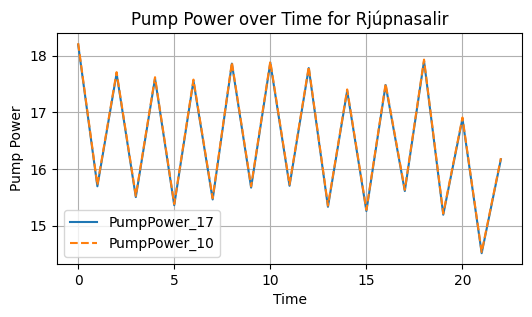

In [19]:

plt.figure(figsize=(6, 3))

# Plot the 'PumpPower_17' data
plt.plot(agent_results_df.index, agent_results_df['PumpPower_17'], label='PumpPower_17')

# Plot the 'PumpPower_10' data
plt.plot(agent_results_df.index, agent_results_df['PumpPower_10'], label='PumpPower_10', linestyle='--')

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Pump Power")
plt.title("Pump Power over Time for Rjúpnasalir")
plt.grid(True)

# Display the legend
plt.legend()

# Show the plot
plt.show()


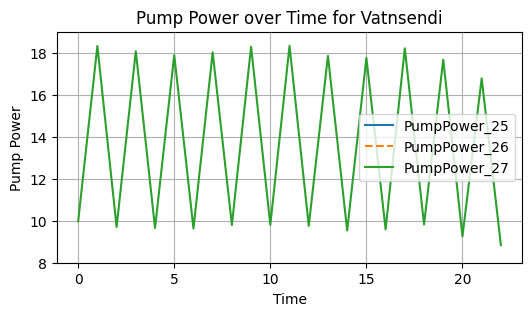

In [29]:

plt.figure(figsize=(6, 3))

# Plot the 'PumpPower_17' data
plt.plot(agent_results_df.index, agent_results_df['PumpPower_25'], label='PumpPower_25')

# Plot the 'PumpPower_10' data
plt.plot(agent_results_df.index, agent_results_df['PumpPower_26'], label='PumpPower_26', linestyle='--')

# Plot the 'PumpPower_10' data
plt.plot(agent_results_df.index, agent_results_df['PumpPower_27'], label='PumpPower_27')

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Pump Power")
plt.title("Pump Power over Time for Vatnsendi")
plt.grid(True)
plt.ylim(8,19)

# Display the legend
plt.legend()

# Show the plot
plt.show()


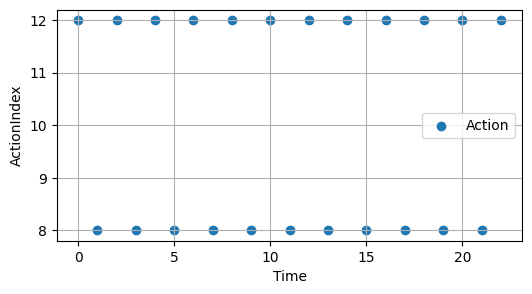

In [21]:

plt.figure(figsize=(6, 3))

# Plot the 'PumpPower_17' data
plt.scatter(agent_results_df.index, agent_results_df['ActionIndex'], label='Action')


# Add labels and title
plt.xlabel("Time")
plt.ylabel("ActionIndex")
# plt.title("Pump Power over Time for Vatnsendi")
plt.grid(True)

# Display the legend
plt.legend()

# Show the plot
plt.show()

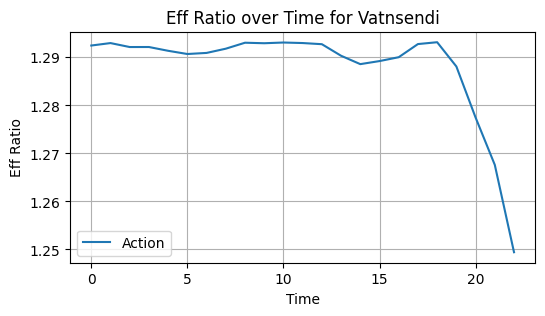

In [22]:

plt.figure(figsize=(6, 3))

# Plot the 'EffRatio' data
plt.plot(agent_results_df.index, agent_results_df['EffRatio'], label='Action')

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Eff Ratio")
plt.title("Eff Ratio over Time for Vatnsendi")
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


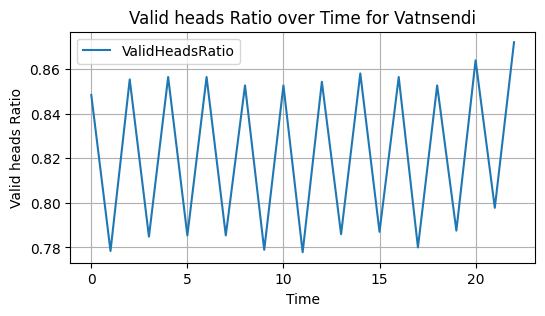

In [23]:

plt.figure(figsize=(6, 3))

# Plot the 'PumpPower_17' data
plt.plot(agent_results_df.index, agent_results_df['ValidHeadsRatio'], label='ValidHeadsRatio')


# Add labels and title
plt.xlabel("Time")
plt.ylabel("Valid heads Ratio")
plt.title("Valid heads Ratio over Time for Vatnsendi")
plt.grid(True)

# Display the legend
plt.legend()

# Show the plot
plt.show()


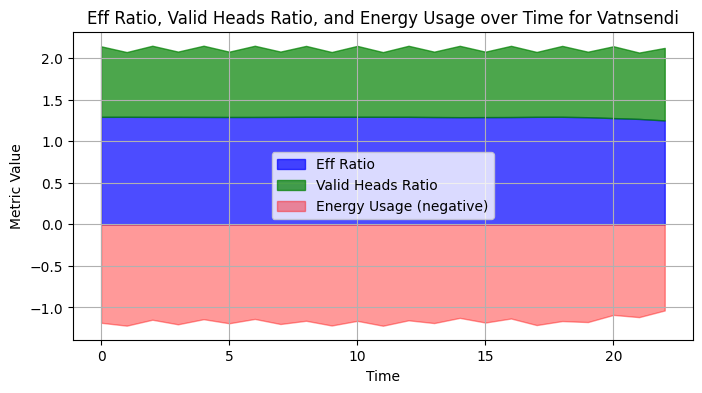

In [24]:
import matplotlib.pyplot as plt

# Create a new column for the sum of EffRatio and ValidHeadsRatio
agent_results_df['Total'] = agent_results_df['EffRatio'] + agent_results_df['ValidHeadsRatio']

plt.figure(figsize=(8, 4))

# Plot the stacked area chart for EffRatio and ValidHeadsRatio
plt.fill_between(agent_results_df.index, 0, agent_results_df['EffRatio'], label='Eff Ratio', color='blue', alpha=0.7)
plt.fill_between(agent_results_df.index, agent_results_df['EffRatio'], agent_results_df['Total'], label='Valid Heads Ratio', color='green', alpha=0.7)

# Plot Energy (negative) below x-axis
plt.fill_between(agent_results_df.index, 0, agent_results_df['Energy'], label='Energy Usage (negative)', color='red', alpha=0.4)

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Metric Value")
plt.title("Eff Ratio, Valid Heads Ratio, and Energy Usage over Time for Vatnsendi")
plt.grid(True)

# Display the legend
plt.legend()

# Show the plot
plt.show()


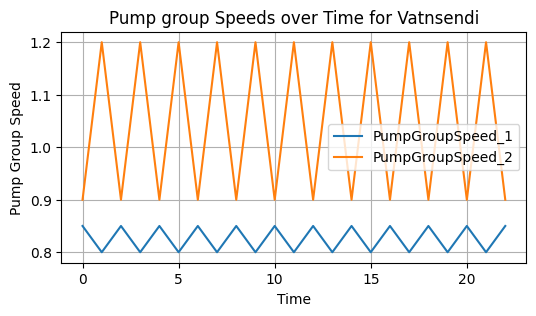

In [25]:

plt.figure(figsize=(6, 3))

# Plot the 'PumpPower_17' data
plt.plot(agent_results_df.index, agent_results_df['PumpGroupSpeed_1'], label='PumpGroupSpeed_1')

# Plot the 'PumpPower_10' data
plt.plot(agent_results_df.index, agent_results_df['PumpGroupSpeed_2'], label='PumpGroupSpeed_2')
# Plot the 'PumpPower_17' data


# Add labels and title
plt.xlabel("Time")
plt.ylabel("Pump Group Speed")
plt.title("Pump group Speeds over Time for Vatnsendi")
plt.grid(True)

# Display the legend
plt.legend()

# Show the plot
plt.show()


In [26]:
for i in range(len(agent_results_df)):
    print(f"Step {i}  Group 1: {agent_results_df['PumpGroupSpeed_1'][i]},  Group 2: {agent_results_df['PumpGroupSpeed_2'][i]}, Demand scale {agent_results_df['DemandScale'][i]}")


Step 0  Group 1: 0.85,  Group 2: 0.9, Demand scale 1.045780954728453
Step 1  Group 1: 0.8,  Group 2: 1.2, Demand scale 1.02688357571276
Step 2  Group 1: 0.85,  Group 2: 0.9, Demand scale 1.0091200394380084
Step 3  Group 1: 0.8,  Group 2: 1.2, Demand scale 1.0113877249198917
Step 4  Group 1: 0.85,  Group 2: 0.9, Demand scale 1.002694930572673
Step 5  Group 1: 0.8,  Group 2: 1.2, Demand scale 0.9996713499301618
Step 6  Group 1: 0.85,  Group 2: 0.9, Demand scale 0.9996713499301618
Step 7  Group 1: 0.8,  Group 2: 1.2, Demand scale 1.007986196697067
Step 8  Group 1: 0.85,  Group 2: 0.9, Demand scale 1.021592309588366
Step 9  Group 1: 0.8,  Group 2: 1.2, Demand scale 1.024993837811191
Step 10  Group 1: 0.85,  Group 2: 0.9, Demand scale 1.0227261523293074
Step 11  Group 1: 0.8,  Group 2: 1.2, Demand scale 1.0276394708733876
Step 12  Group 1: 0.85,  Group 2: 0.9, Demand scale 1.0159230958836578
Step 13  Group 1: 0.8,  Group 2: 1.2, Demand scale 0.9974036644482788
Step 14  Group 1: 0.85,  Group

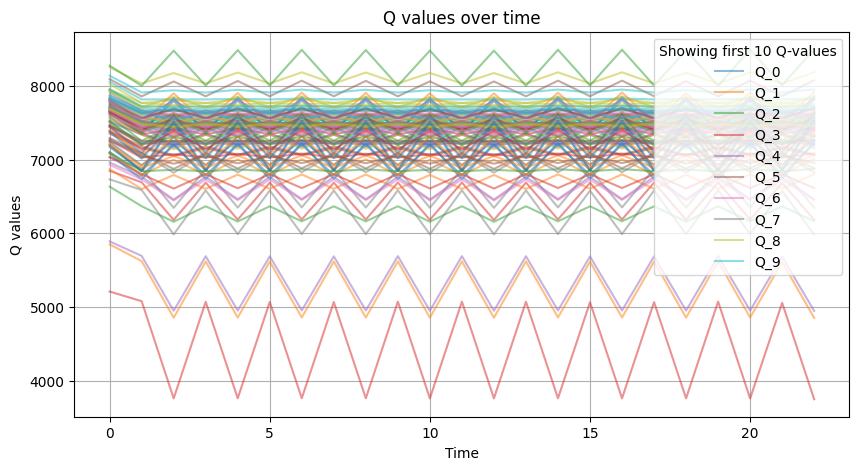

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Loop through all Q-value columns
for i in range(100):
    plt.plot(agent_results_df.index, agent_results_df[f'Q_{i}'], label=f'Q_{i}', alpha=0.5)

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Q values")
plt.title("Q values over time")
plt.grid(True)

# Display legend only for the first few to avoid clutter
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:10], labels[:10], loc='upper right', title='Showing first 10 Q-values')

# Show the plot
plt.show()
